In [1]:
import numpy as np
import scipy.linalg

In [44]:
N = 8;
F = np.array([[ -6, 47, -42, -66, 35, 21, 9, 2],
[89, -64, 4, 56, 20, 11, -59, -57]])
print("Matrix F ="); print(F)
cov = (F @ F.T) * 1/N
print("Covarianvce matrix C = "); print(cov)
D, V = np.linalg.eig(cov)
idx = np.abs(D).argsort(); idx=idx[::-1]
D = D[idx]
V = V[:,idx]

print("C is positive semi-definite since the eigen values are non-negative: "); print(D)
print("The Principal Components of F are the eigen vectors of C which are:"); print(V)
print("The Eigen Vectors of C/Principal components of F are orthogonal and their dot product is: ", 
      np.dot(np.array([V[:,0]]) ,np.array([V[:, 1]]).T))
T1 = V.T @ F
print("The Expansion Coefficients  T = "); print(T1)

Matrix F =
[[ -6  47 -42 -66  35  21   9   2]
 [ 89 -64   4  56  20  11 -59 -57]]
Covarianvce matrix C = 
[[1264.5 -890. ]
 [-890.  2802.5]]
C is positive semi-definite since the eigen values are non-negative: 
[3209.70618941  857.29381059]
The Principal Components of F are the eigen vectors of C which are:
[[ 0.41605472 -0.90933958]
 [-0.90933958 -0.41605472]]
The Eigen Vectors of C/Principal components of F are orthogonal and their dot product is:  [[0.]]
The Expansion Coefficients  T = 
[[-83.42755072  77.75230496 -21.11165671 -78.3826281   -3.62487621
   -1.26558615  57.39552757  52.66446535]
 [-31.57283295 -16.11145781  36.52804335  36.71734757 -40.14797968
  -23.67273308  16.36317251  21.8964401 ]]


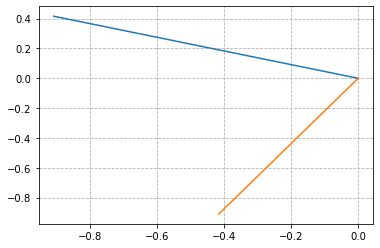

In [16]:
import matplotlib.pyplot as plt
plt.plot([[0,0],[V[0][0], V[1][0]]], [[0,0],[V[0][1], V[1][1]]])
plt.grid(linestyle = '--',axis='both')

The Matrix F reconstructed using the first 3 PCAs of 5 stock prices for the last 8 days is :
[[ 5.25     5.16728  4.92197  4.52252  3.98266  3.32092  2.55992  1.72558]
 [ 4.       3.99049  3.95459  3.87141  3.70977  3.43326  3.00644  2.40132]
 [ 0.       0.       0.       0.       0.       0.       0.       0.     ]
 [-5.8     -5.63698 -5.16044 -4.4067  -3.43253 -2.30985 -1.11909  0.05805]
 [ 2.25     2.22708  2.15879  2.04651  1.89254  1.70001  1.47285  1.21568]]


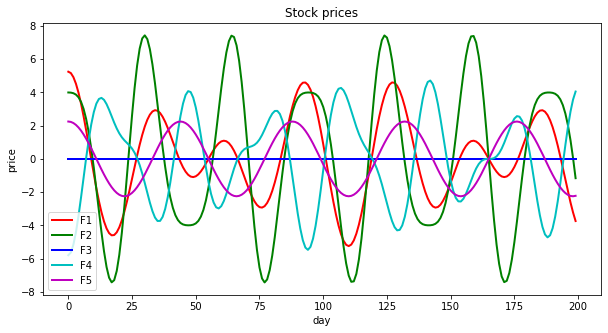

In [231]:
# Q2A
from numpy.matrixlib.defmatrix import matrix
N1=1300; t=np.arange(0,N1); t.shape=(1,N1);
p = 200; tp = np.arange(0, p); tp.shape = (1,p)
V1=np.array(matrix("[1;2;0;-1.1;0]"));
V2=np.array(matrix("[0;-1;0;-0.8;0]"));
V3=np.array(matrix("[1.5;0;0;-0.6;1.5]"));
F1=3*V1@np.cos(t/5) \
+2*V2@np.cos(t/3)+1.5*V3@np.cos(t/7);
np.set_printoptions(linewidth=132,precision=5)
print("The Matrix F reconstructed using the first 3 PCAs of 5 stock prices for the last 8 days is :");
print(F1[:,0:8]);

import matplotlib.pyplot as plt
import matplotlib
#fig1=plt.figure(1); plt.clf()
plt.figure(figsize = (10,5))
plt.plot(tp.T,F1[0,tp].T,'r-',linewidth=2, label = "F1")
plt.plot(tp.T,F1[1,tp].T,'g-',linewidth=2, label = "F2")
plt.plot(tp.T,F1[2,tp].T,'b-',linewidth=2, label = "F3")
plt.plot(tp.T,F1[3,tp].T,'c-',linewidth=2, label = "F4")
plt.plot(tp.T,F1[4,tp].T,'m-',linewidth=2, label = "F5")
plt.legend()
plt.xlabel('day'); plt.ylabel('price'); plt.title('Stock prices')
plt.show(block=False)

In [232]:
# Q2B
means_f = np.mean(F1, axis = 1); means_f.shape = (5,1)
F1 = F1 - means_f
print("Means of the daily prices of stocks are :");print(means_f)
print("Demeaned matrix F - means = "); print(F1)
C1 = (F1 @ F1.T) * 1/N1
print("Covariance matrix C ="); print(C1)
print("C.T = "); print(C1.T)

Means of the daily prices of stocks are :
[[ 0.00726]
 [ 0.02063]
 [ 0.     ]
 [-0.00907]
 [-0.00259]]
Demeaned matrix F - means = 
[[ 5.24274  5.16002  4.9147  ... -2.90263 -3.47047 -3.94397]
 [ 3.97937  3.96986  3.93396 ... -2.03451 -3.74443 -5.21567]
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 [-5.79093 -5.62792 -5.15137 ...  1.0525   1.22007  1.42903]
 [ 2.25259  2.22967  2.16138 ... -2.24217 -2.24115 -2.19442]]
Covariance matrix C =
[[ 6.94345  8.89442  0.      -5.89742  2.4932 ]
 [ 8.89442 19.97736  0.      -8.24724 -0.09313]
 [ 0.       0.       0.       0.       0.     ]
 [-5.89742 -8.24724  0.       7.08629 -0.97346]
 [ 2.4932  -0.09313  0.      -0.97346  2.53595]]
C.T = 
[[ 6.94345  8.89442  0.      -5.89742  2.4932 ]
 [ 8.89442 19.97736  0.      -8.24724 -0.09313]
 [ 0.       0.       0.       0.       0.     ]
 [-5.89742 -8.24724  0.       7.08629 -0.97346]
 [ 2.4932  -0.09313  0.      -0.97346  2.53595]]


In [233]:
# Q2C
D1, V1 = np.linalg.eig(C1)
idx1 = np.abs(D1).argsort(); idx1=idx1[::-1]
D1 = D1[idx1]
V1 = V1[:,idx1]
print("The Eigen values of C are: "); print(D1)
print("The Eigen Vectors of C and the Principal Components of F are : "); print(V1)

The Eigen values of C are: 
[2.91489e+01 5.29641e+00 2.09772e+00 6.30429e-16 0.00000e+00]
The Eigen Vectors of C and the Principal Components of F are : 
[[ 0.43553  0.49695  0.22515 -0.716    0.     ]
 [ 0.79628 -0.50684  0.25305  0.21215  0.     ]
 [ 0.       0.       0.       0.       1.     ]
 [-0.41643 -0.37303  0.78557 -0.26519  0.     ]
 [ 0.05325  0.59749  0.51784  0.60993  0.     ]]


The Expansion Coefficients  T = 
[[ 7.98351e+00  7.87080e+00  7.53330e+00  6.97323e+00  6.19553e+00  5.20938e+00  4.03011e+00  2.68100e+00]
 [ 4.09458e+00  3.98378e+00  3.66150e+00  3.15690e+00  2.51515e+00  1.79261e+00  1.05084e+00  3.50151e-01]
 [-1.19529e+00 -1.10013e+00 -8.25453e-01 -4.02469e-01  1.20617e-01  6.83899e-01  1.22234e+00  1.67290e+00]
 [ 1.55431e-15  4.44089e-16  0.00000e+00 -2.22045e-16  0.00000e+00 -2.22045e-16 -3.33067e-16 -8.88178e-16]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]]


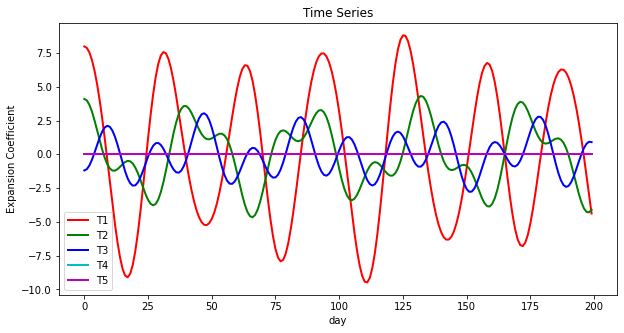

In [234]:
# Q2D
T2 = V1.T @ F1
print("The Expansion Coefficients  T = "); print(T2[:, 0:8])
plt.figure(figsize = (10,5))
plt.plot(tp.T,T2[0,tp].T,'r-',linewidth=2, label = "T1")
plt.plot(tp.T,T2[1,tp].T,'g-',linewidth=2, label = "T2")
plt.plot(tp.T,T2[2,tp].T,'b-',linewidth=2, label = "T3")
plt.plot(tp.T,T2[3,tp].T,'c-',linewidth=2, label = "T4")
plt.plot(tp.T,T2[4,tp].T,'m-',linewidth=2, label = "T5")
plt.legend()
plt.xlabel('day'); plt.ylabel('Expansion Coefficient'); plt.title('Time Series')
plt.show(block=False)

In [242]:
#Q2E
F_recons_1 = V1[:, 0:1] @ T2[0:1,:]
print("F reconstricted using only PC 1 = ");print(F_recons_1[:,0:8])
F_recons_2 = V1[:, 0:2] @ T2[0:2,:]
print("F reconstricted using PC1 & PC2 = ");print(F_recons_2[:,0:8])

F reconstricted using only PC 1 = 
[[ 3.47704  3.42795  3.28096  3.03703  2.69832  2.26883  1.75523  1.16765]
 [ 6.35715  6.2674   5.99865  5.55268  4.93341  4.14815  3.20912  2.13484]
 [ 0.       0.       0.       0.       0.       0.       0.       0.     ]
 [-3.32455 -3.27761 -3.13707 -2.90384 -2.57998 -2.16933 -1.67825 -1.11644]
 [ 0.4251   0.4191   0.40113  0.37131  0.3299   0.27739  0.21459  0.14276]]
F reconstricted using PC1 & PC2 = 
[[ 5.51186  5.40771  5.10056  4.60587  3.94824  3.15967  2.27745  1.34166]
 [ 4.28184  4.24824  4.14284  3.95262  3.65862  3.23957  2.6765   1.95737]
 [ 0.       0.       0.       0.       0.       0.       0.       0.     ]
 [-4.85195 -4.76369 -4.50292 -4.08146 -3.51821 -2.83803 -2.07025 -1.24706]
 [ 2.87156  2.79936  2.58883  2.25752  1.83267  1.34845  0.84246  0.35197]]


Text(0, 0.5, '$\\log(\\sigma_n)$')

<Figure size 1800x1200 with 0 Axes>

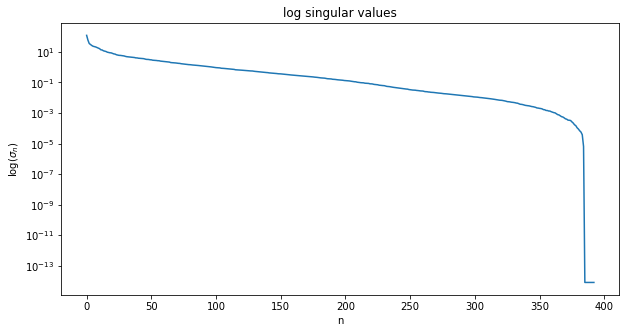

In [246]:
#Q4A 
import imageio; from skimage.color import rgb2gray;
A=imageio.imread('/Users/ssama/Downloads/coronavirus.jpg');
A=rgb2gray(A); A=np.double(A); A=A-np.mean(A);
fig1=plt.figure(1,dpi=300);

#plt.imshow(A); plt.set_cmap('gray');plt.colorbar()
U,S,V = scipy.linalg.svd(A)

plt.figure(figsize = (10,5))
plt.semilogy(S)
plt.title('log singular values')
plt.xlabel('n')
plt.ylabel('$\log(\sigma_n)$')


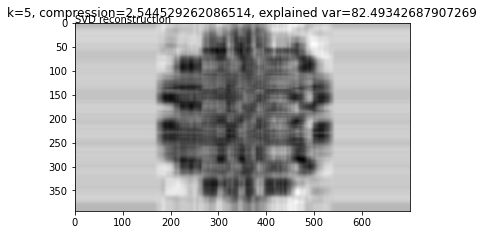

Enter to continue...


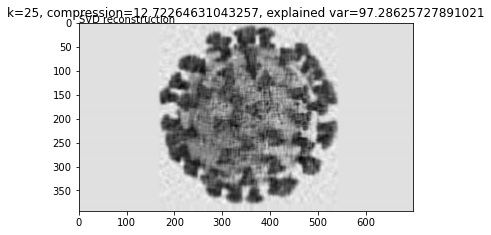

Enter to continue...


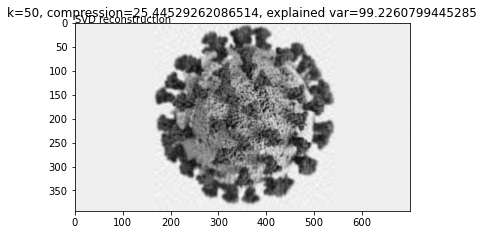

Enter to continue...


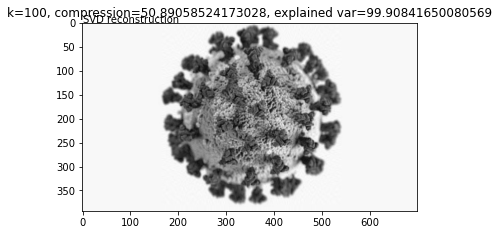

Enter to continue...


In [124]:
N = np.size(A[:,1])
ifig = 0;
ifig=ifig+1; 
for k in [5, 25, 50, 100]:
    fig=plt.figure(ifig); plt.clf()
  
    ## low-rank SVD reconstruction using k degrees:
    # note that in python A=U*S*V rather than V^T
    Ak = U[:,0:k]@np.diag(S[0:k])@V[0:k,:]
    compression_ratio=100*N*k*2/N**2

    ## Two methods to calculate explained variance; I verified they
    ## are the same during debugging:
    explained_variance=100*sum(S[0:k]**2)/sum(S[:]**2)
    explained_variance2=100*sum(Ak**2)/sum(A*A)
    
    ## show reconstructed image:
    plt.imshow(Ak); plt.set_cmap('gray')
    plt.title('k='+repr(k)+', compression='+repr(compression_ratio)+', explained var='+repr(explained_variance))
    plt.text(0.1,0.1,'SVD reconstruction')
    fig.canvas.flush_events()
    plt.pause(0.05)
    wait=input("Enter to continue...")

In [243]:
U1, S1, V1 =scipy.linalg.svd(np.array([[-10,-9,8], [0,4,3]]))
SS = np.zeros((2,3))
for i in range(min(2, 3)):
    SS[i, i] = S1[i]
print("Reconstruction of Matrix using SVD :");print(np.matmul((U1 @ SS) ,V1))
UU = np.array([[0.99852, 0.0543], [-0.0543, 0.99852]])
SS1 = np.array([[15.6733, 0, 0], [0,4.9343, 0]])
VV = np.array([[-0.63708, -0.11005, 0.76289], [-0.58723, 0.71041, -0.38791], [0.49927, 0.69513, 0.51722]])
print("Multiplying Hand Calculated U, S, V = "); print(np.matmul(UU, np.matmul(SS1, VV.T)))

Reconstruction of Matrix using SVD :
[[-1.00000e+01 -9.00000e+00  8.00000e+00]
 [ 1.11022e-16  4.00000e+00  3.00000e+00]]
Multiplying Hand Calculated U, S, V = 
[[-9.99985e+00 -8.99987e+00  7.99988e+00]
 [-2.26200e-05  3.99996e+00  2.99999e+00]]


In [228]:
# Q5 Part A
from scipy.optimize import minimize
A=np.array([ [1.97, 3.59, -0.177, 0.726],
[-4.06, 0.879, -0.513, 3.4],
[0.411, 5.16, -0.308, 0.756],
[3.34, -2.41, -0.0974, 3.33]])

print("Finding the Matrix norm and Condition number using SVD for A")

U2, S2, V2 = scipy.linalg.svd(A)

print("The matrix norm of A is equal to the largest singular value: "); print(max(S2))

print("The Condition number of matrix A = S_max / S_min: "); print(max(S2)/min(S2))

print("Matrix norm using np.linalg.norm(A,2) :"); print(np.linalg.norm(A,2))
print("Condition number of A using np.linalg.cond(A,2) :"); print(np.linalg.cond(A,2))

#Part B
def objective(x):
    return -np.dot(np.dot(np.dot(x.T, A.T), A), x)
def contrsint(x):
    return np.dot(x.T, x) - 1
cons = ({'type': 'eq', 'fun': contrsint})
x0 =  np.zeros(A.shape[1])
res = minimize(objective, x0, method='SLSQP', constraints=cons)
print("The Vector for which ||Ax||/||x|| = ||A|| is :"); print(res.x)
print("This is same as the Eigen vector corresponding to largest eigen value of A.T @ A.", 
      "Which is the the first column of V:"); 
print(V2.T[:,0])

# Part C
b =np.array([ [0.476], [0.268], [0.741], [-0.391]]);
delta_b=np.array([[-0.744], [-0.153], [0.626], [0.176]]);
db = b + delta_b
x1 = np.linalg.solve(A,b)
x2 = np.linalg.solve(A, db)
print("The solution to Ax = b is: ");print(x1)
print("The solution to Ax = b + delta_b is:"); print(x2)
delta_x = x2 - x1
print("delta_x = "); print(delta_x)
print("Relative error to the solution = ||delta_x||/||x|| ="); print(np.linalg.norm(delta_x)/np.linalg.norm(x1))
print("Relative error to RHS / b = ||delta_b||/||b|| = "); print(np.linalg.norm(delta_b)/ np.linalg.norm(b))

Finding the Matrix norm and Condition number using SVD for A
The matrix norm of A is equal to the largest singular value: 
6.8390293788493475
The Condition number of matrix A = S_max / S_min: 
51682.79239508083
Matrix norm using np.linalg.norm(A,2) :
6.839029378849345
Condition number of A using np.linalg.cond(A,2) :
51682.7923950808
The Vector for which ||Ax||/||x|| = ||A|| is :
[-0.16759  0.98108 -0.06025  0.07587]
This is same as the Eigen vector corresponding to largest eigen value of A.T @ A. Which is the the first column of V:
[-0.16759  0.98108 -0.06025  0.07587]
The solution to Ax = b is: 
[[ 0.01318]
 [ 0.08975]
 [-1.12672]
 [-0.09864]]
The solution to Ax = b + delta_b is:
[[-254.29941]
 [ 360.78625]
 [7506.27495]
 [ 735.66098]]
delta_x = 
[[-254.31259]
 [ 360.6965 ]
 [7507.40167]
 [ 735.75962]]
Relative error to the solution = ||delta_x||/||x|| =
6659.47984179714
Relative error to RHS / b = ||delta_b||/||b|| = 
0.9997175623424783
